In [1]:
# !pip install pydotplus
# !pip install pytesseract
# !pip install gTTS

In [12]:
# !sudo apt update
# !sudo apt install -y tesseract-ocr
# !pip install opencv-python

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,611 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,163 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,449 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64

In [14]:
# !sudo apt-get install -y tesseract-ocr-ara

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ara
0 upgraded, 1 newly installed, 0 to remove and 51 not upgraded.
Need to get 645 kB of archives.
After this operation, 1,447 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ara all 1:4.00~git30-7274cfa-1.1 [645 kB]
Fetched 645 kB in 1s (1,039 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-ara.
(Reading data

In [15]:
# !ls /usr/share/tesseract-ocr/4.00/tessdata/

ara.traineddata  configs  eng.traineddata  osd.traineddata  pdf.ttf  tessconfigs


In [8]:
import pydotplus
from IPython.display import display, Image
import matplotlib.pyplot as plt
import pytesseract
from gtts import gTTS
import IPython.display as ipd
from requests import get
import cv2

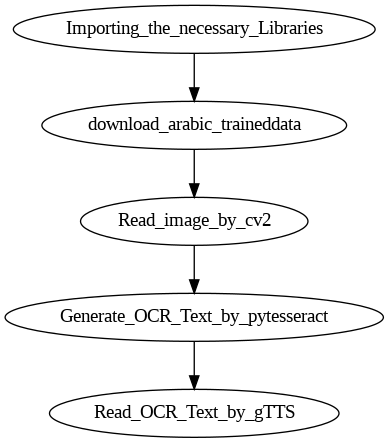

In [9]:
myplan="""digraph {
            Importing_the_necessary_Libraries ->
            download_arabic_traineddata ->
            Read_image_by_cv2 ->
            Generate_OCR_Text_by_pytesseract ->
            Read_OCR_Text_by_gTTS
        }"""

myGraph = pydotplus.graph_from_dot_data(myplan)
myGraph.write_png("myplan.png")
display(Image('./myplan.png'))

In [7]:
def download(url,filename):
    with open(filename,"wb") as file:
        response=get(url)
        file.write(response.content)

download("https://github.com/tesseract-ocr/tesseract/blob/master/tessdata/ara.traineddata?raw=true","ara.traineddata")

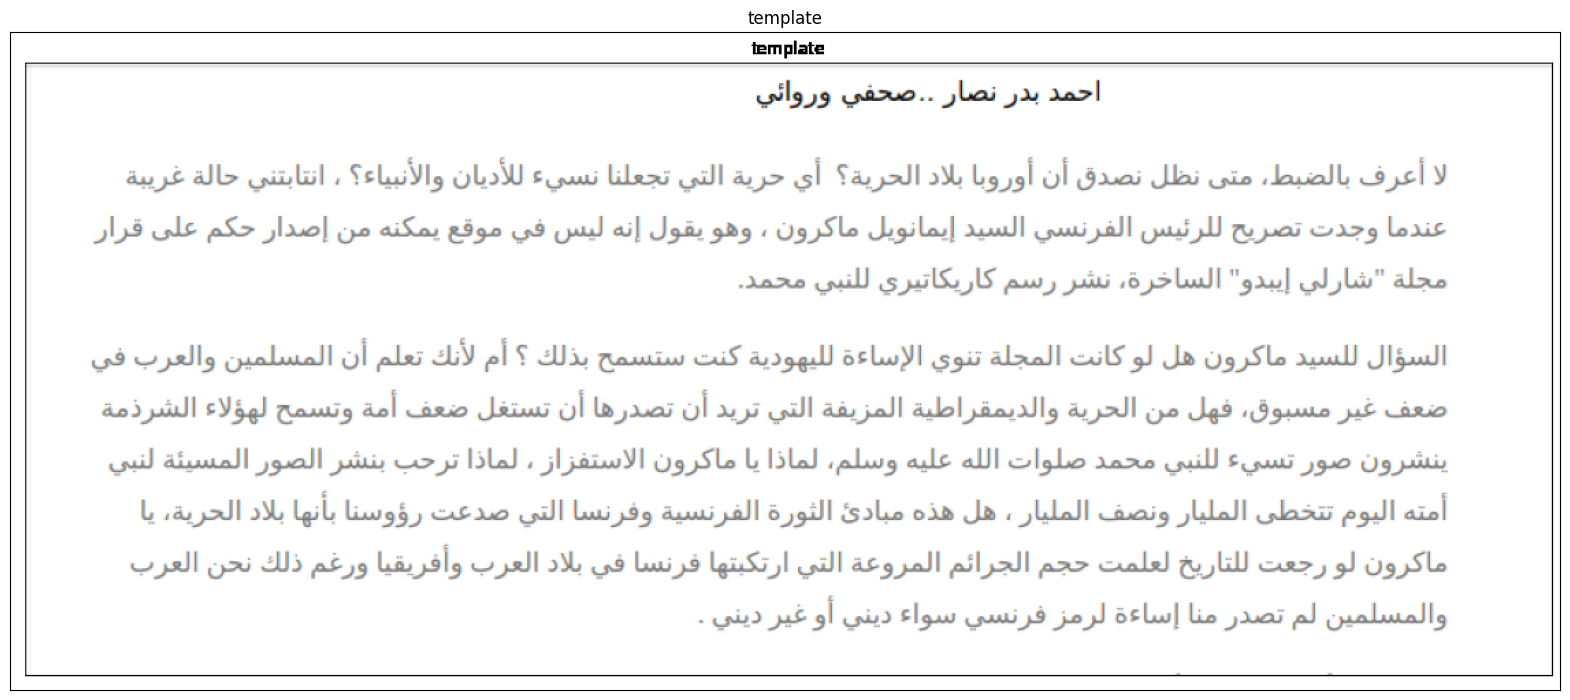

In [10]:
img = cv2.imread('Arabic_OCR.png')
plt.figure(figsize=(20, 20))
plt.imshow(img,cmap = 'gray')
plt.title('template'), plt.xticks([]), plt.yticks([])

plt.show()

In [16]:
text = pytesseract.image_to_string(img,lang='ara')
print(text)

 

عاقاممها

احمد بدر نصار ...صحفي وروائي

لا أعرف بالضبط, متى نظل نصدق أن أوروبا بلاد الحرية؟ أي حرية التي تجعلنا نسيء للأديان والأنبياء؟ , انتابتني حالة غريبة
عندما وجدت تصريح للرئيس الفرنسي السيد إيمانويل ماكرون ‎٠‏ وهو يقول إنه ليس في موقع يمكنه من إصدار حكم على قرار

مجلة "شارلي إيبدو” الساخرة. نشر رسم كاريكاتيري للنبي محمد.

السؤال للسيد ماكرون هل لو كانت المجلة تنوي الإساءة لليهودية كنت ستسمح بذلك ؟ أم لأنك تعلم أن المسلمين والعرب في
ضعف غير مسبوق, فهل من الحرية والديمقراطية المزيفة التي تريد أن تصدرها أن تستغل ضعف أمة وتسمح لهؤلاء الشرذمة
ينشرون صور تسيء للنبي محمد صلوات الله عليه وسلم, لماذا يا ماكرون الاستفزاز , لماذا ترحب بنشر الصور المسيئة لنبي
أمته اليوم تتخطى المليار وتصف المليار . هل هذه مبادئ الثورة الفرنسية وفرنسا التي صدعت رؤوسنا بأنها بلاد الحرية يا
ماكرون لو رجعت للتاريخ لعلمت حجم الجرائم المروعة التي ارتكبتها فرنسا في بلاد العرب وأفريقيا ورغم ذلك نحن العرب
والمسلمين لم تصدر منا إساءة لرمز فرنسي سواء ديني أو غير ديني .

 

 

 



In [17]:
tts = gTTS(text, lang='ar')
tts.save("Arabic_OCR.mp3")
ipd.Audio("./Arabic_OCR.mp3")